In [30]:
links = []
with open('links.txt', encoding='utf-8') as f:
    links = [t for t in f.read().split('\n')]
print(len(links))

14


In [31]:
import csv
import re
import requests

MAX_REVIEW = 100
with open('reviews.csv', 'w', encoding='utf-8-sig') as f:
    headers = ['sentiment', 'comment']
    writer = csv.DictWriter(f, delimiter=',', lineterminator='\n', fieldnames=headers)
    writer.writeheader()
    for url in links:
        r = re.search(r"i\.(\d+)\.(\d+)", url)
        shop_id, item_id = r[1], r[2]
        ratings_url = "https://shopee.vn/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0"
        offset = 0
        _5_start = 0
        while True:
            data = requests.get(ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)).json()
            i = 1
            try:
                for i, rating in enumerate(data["data"]["ratings"],1):
                    start = rating["rating_star"]
                    if start == 5 and _5_start <= MAX_REVIEW and rating["comment"] != '':
                        _5_start += 1
                        writer.writerow({headers[0]:start, headers[1]:rating["comment"].replace('\n', ' ')})
                    if start != 5 and rating["comment"] != '':
                        writer.writerow({headers[0]:start, headers[1]:rating["comment"].replace('\n', ' ')})
            except:
                break
            if i % 20:
                break
            offset += 20

In [32]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df

,sentiment,comment
0,4,"Màu sắc:xám , đen Đúng với mô tả:Chưa bóc hàng..."
1,5,Chất liệu:mềm Màu sắc:đen Rất đáng để mua 👍hì...
2,5,Giao hàng nhanh. Sản phẩm đẹp nhưng mà hơi mỏ...
3,3,"vải có vẻ dãn, nhìn hơi to nhưng cũng khá đẹp ..."
4,5,"tất mỏng, mỏng như tờ.. nói chung đi hết mùa đ..."
...,...,...
3307,2,Hương vị:ổn Ib thắc mắc thì k thèm tl
3308,4,Đặt 1 kiểu giao 1 kiểu
3309,3,Khách nhắn tin không thèm rep
3310,4,Shop đóng hàng k bọc kĩ hộp sữa bị méo rách hic


5    1383
1     729
4     624
3     355
2     221
Name: sentiment, dtype: int64


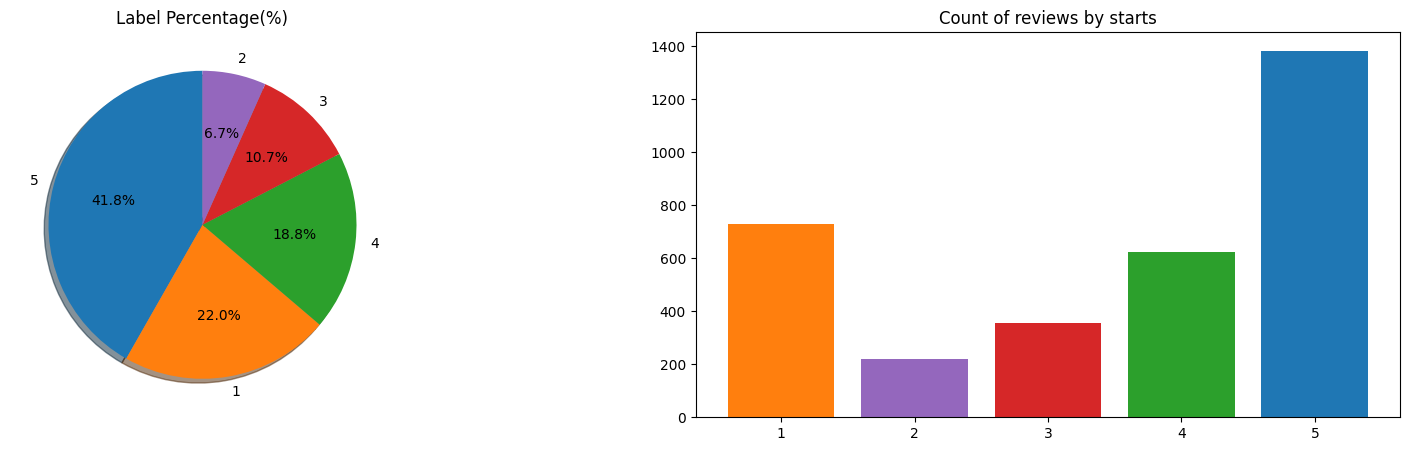

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,5))

labels = df['sentiment'].value_counts().keys()
sizes = df['sentiment'].value_counts()

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Label Percentage(%)')
axes[1].bar(labels, sizes, color=sns.color_palette())
axes[1].set_title('Count of reviews by starts')
print(df['sentiment'].value_counts())